In [1]:
#Gerekli kütüphaneleri yüklüyoruz
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Uyarıları kapatıyoruz
warnings.filterwarnings('ignore')

In [3]:
# Veri setlerini yüklüyoruz
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
print(train.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [5]:
print(test.head())


     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6

In [6]:
# Veri setlerinin boyutlarını yazdırma
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 81)
Test shape: (1459, 80)


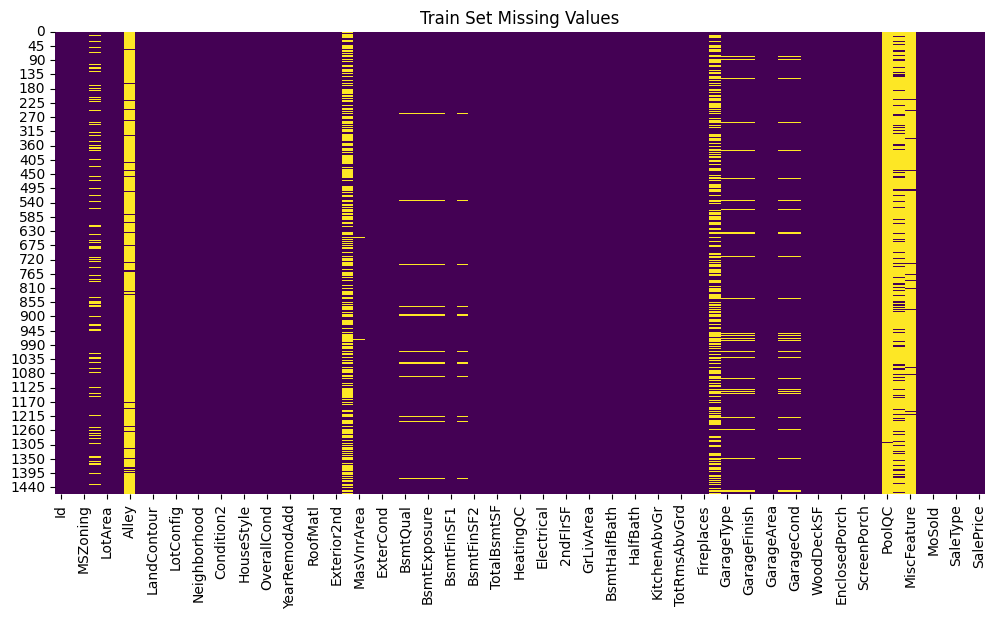

In [7]:
# Eksik verileri görselleştirme
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Train Set Missing Values')
plt.show()


In [8]:
# Eğitim veri setinde 'SalePrice' sütunu mevcut
target_variable = 'SalePrice'

In [9]:
# Özellikler (X) ve hedef değişken (y) ayırma
X_train = train.drop(columns=[target_variable])  # Eğitim setindeki özellikler
y_train = train[target_variable]                   # Eğitim setindeki hedef değişken

In [10]:
# Validation seti ayırmak için train verisinden bölme yapıyoruz
X_train, X_val, y_train, y_val = train_test_split(
    train.drop(columns=[target_variable]),  # Eğitim setindeki özellikler
    train[target_variable],                # Eğitim setindeki hedef değişken
    #test_size=0.2,                            # %20'sini doğrulama seti olarak ayır
    random_state=175                             # Tekrarlanabilirlik için sabit
)


In [11]:
# Kategorik ve sayısal özelliklerin ayrılması
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

In [12]:
# Veri ön işleme
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))  # Sayısal veriler için ortalama ile doldurma
])


In [13]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Kategorik veriler için 'missing' ile doldurma
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Kategorik verileri one-hot encoding ile dönüştürme
])

In [14]:
# Tüm dönüşümleri birleştirme
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),       # Sayısal dönüşüm
        ('cat', categorical_transformer, categorical_features)  # Kategorik dönüşüm
    ])

In [15]:
# Modelin tanımlanması
model = Pipeline(steps=[
    ('preprocessor', preprocessor),                      # Ön işleme adımı
    ('regressor', RandomForestRegressor(n_estimators=200))  # Random Forest Regresyon modeli
])

In [16]:
# Modelin eğitilmesi
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(n_estimators=200))])

In [17]:
# Modelin doğrulama setindeki performansını değerlendirme (isteğe bağlı)
val_score = model.score(X_val, y_val)
print(f"Validation Score: {val_score}")

Validation Score: 0.8918756042333951


In [18]:
# Eğitim seti için tahmin yapma
y_train_pred = model.predict(X_train)

# Doğrulama seti için tahmin yapma
y_val_pred = model.predict(X_val)

In [19]:
# Eğitim seti için MSE, RMSE, R² hesaplama
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Doğrulama seti için MSE, RMSE, R² hesaplama
mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)
r2_val = r2_score(y_val, y_val_pred)

In [20]:
# Sonuçları ekrana yazdırma
print("Eğitim Seti:")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nDoğrulama Seti:")
print(f"RMSE: {rmse_val}")
print(f"R²: {r2_val}")

Eğitim Seti:
RMSE: 11630.965787755997
R²: 0.9775050106977186

Doğrulama Seti:
RMSE: 27818.120474475247
R²: 0.8918756042333951


In [21]:
# Test setindeki 'SalePrice' tahminleri
# Test setinde 'SalePrice' olmadığı için sadece özellikleri kullanarak tahmin yapıyoruz.
test_predictions = model.predict(test)

In [22]:
# Tahmin sonuçlarını bir DataFrame'e kaydetme
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': test_predictions})

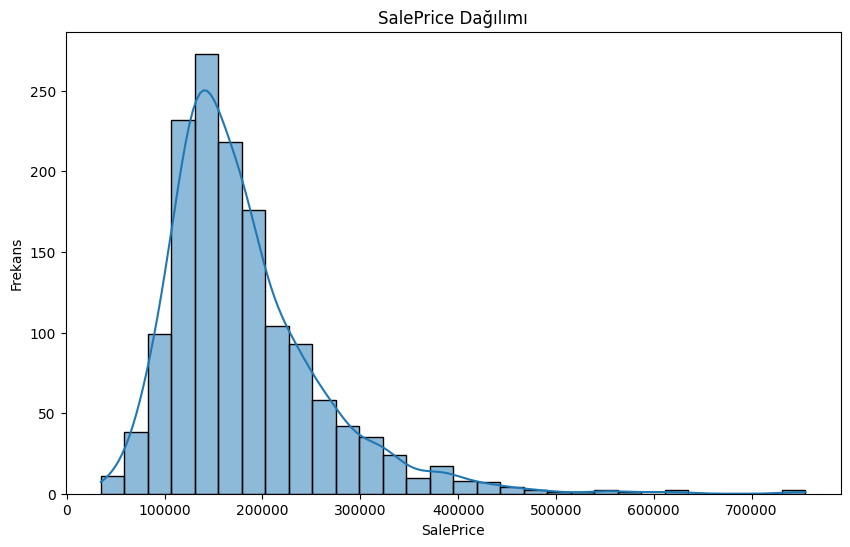

In [23]:
# Fiyat dağılımının histogramı
plt.figure(figsize=(10, 6))
sns.histplot(train['SalePrice'], bins=30, kde=True)
plt.title('SalePrice Dağılımı')
plt.xlabel('SalePrice')
plt.ylabel('Frekans')
plt.show()

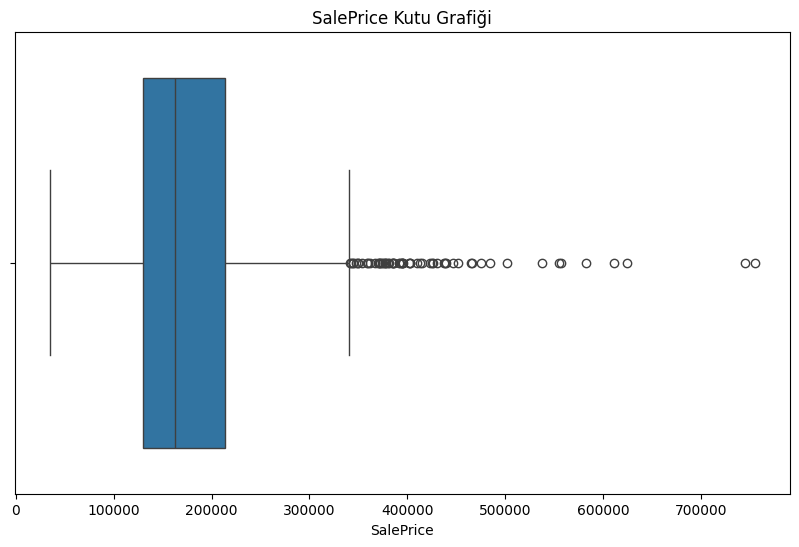

In [24]:
# Fiyatların kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x=train['SalePrice'])
plt.title('SalePrice Kutu Grafiği')
plt.xlabel('SalePrice')
plt.show()

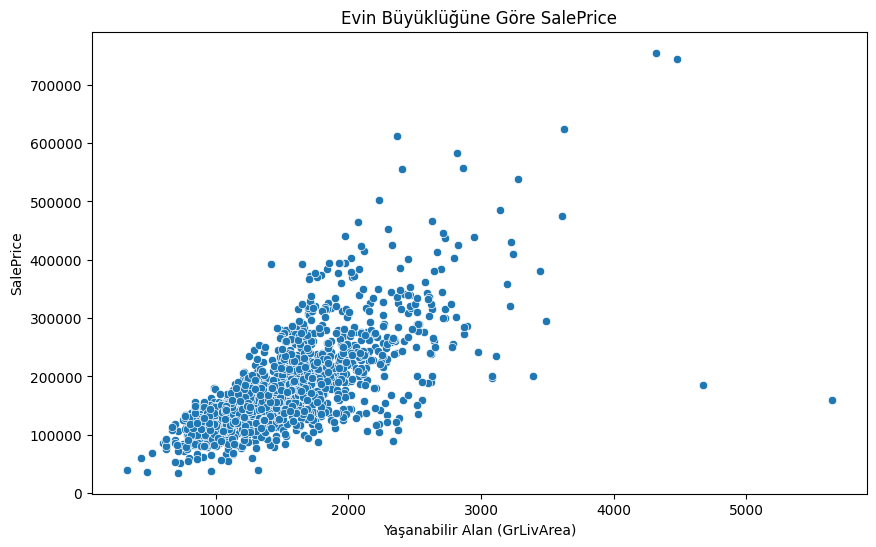

In [25]:
# Evin büyüklüğüne göre fiyatların scatter plot'u
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('Evin Büyüklüğüne Göre SalePrice')
plt.xlabel('Yaşanabilir Alan (GrLivArea)')
plt.ylabel('SalePrice')
plt.show()

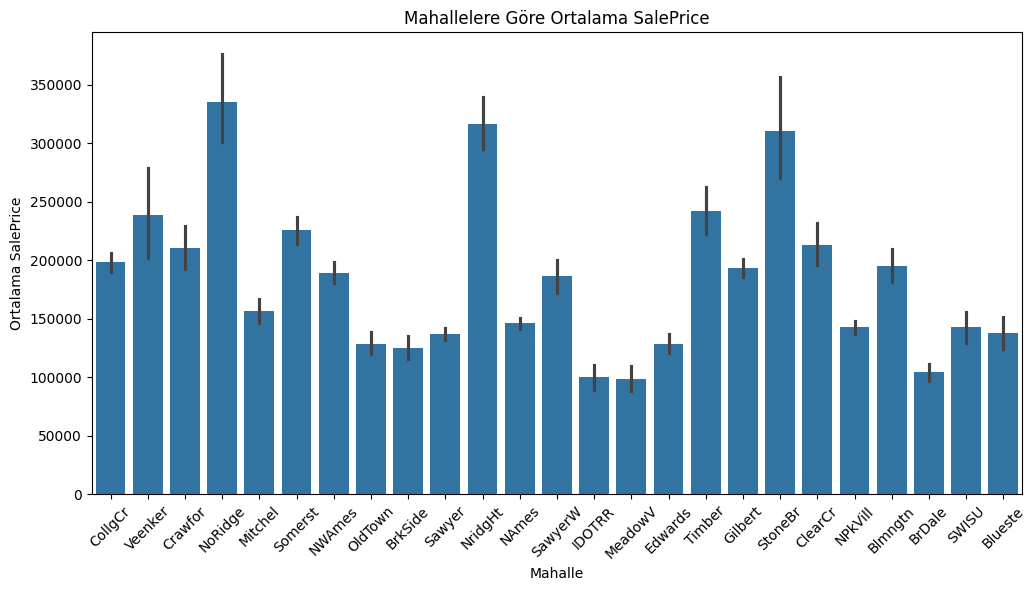

In [26]:
# Mahallelere göre ortalama fiyatların çubuk grafiği
plt.figure(figsize=(12, 6))
sns.barplot(x='Neighborhood', y='SalePrice', data=train, estimator='mean')
plt.title('Mahallelere Göre Ortalama SalePrice')
plt.xticks(rotation=45)
plt.xlabel('Mahalle')
plt.ylabel('Ortalama SalePrice')
plt.show()